## Grucenje

In [0]:
import pandas as pd

df = pd.read_csv('drive/My Drive/FERI/MAG/TRIR/Data/happiness_oecd_continents.csv', sep=';', decimal='.', index_col='Country')
df.head()

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Regions,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2015,Happiness Score 2015,Air pollution (Micrograms per cubic metre),Dwellings without basic facilities (Percentage),Educational attainment (Percentage),Employees working very long hours (Percentage),Employment rate (Percentage),Feeling safe walking alone at night (Percentage),Homicide rate (Ratio),Household net adjusted disposable income (US Dollar),Household net financial wealth (US Dollar),Housing expenditure (Percentage),Labour market insecurity (Percentage),Life expectancy (Years),Life satisfaction (Average score),Long-term unemployment rate (Percentage),Personal earnings (US Dollar),Quality of support network (Percentage),Rooms per person (Ratio),Self-reported health (Percentage),Stakeholder engagement for developing regulations (Average score),Student skills (Average score),Time devoted to leisure and personal care (Hours),Voter turnout (Percentage),Water quality (Percentage),Years in education (Years),RankDiff2017,RankDiff2016,Continent
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,141.0,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,Southern Asia,154.0,3.360,153.0,3.575,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,-13.0,1.0,asia
Albania,109.0,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,Central and Eastern Europe,109.0,4.655,95.0,4.959,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,0.0,14.0,europe
Algeria,53.0,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,Middle East and Northern Africa,38.0,6.355,68.0,5.605,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,15.0,-30.0,africa
Angola,140.0,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,Sub-Saharan Africa,141.0,3.866,137.0,4.033,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,-1.0,4.0,africa
Argentina,24.0,6.599,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,Latin America and Caribbean,26.0,6.650,30.0,6.574,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,-2.0,-4.0,ameriacas


In [0]:
df.shape

(169, 41)

In [0]:
df.loc[df.index == 'Cuba']
df.drop('Cuba', axis=0, inplace=True)

separating number values from categorical

In [0]:
df_continent = pd.DataFrame(df['Continent'], columns=['Continent'])
df.drop(['Regions', 'Continent'], axis=1, inplace = True)
df.head(10)

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2015,Happiness Score 2015,Air pollution (Micrograms per cubic metre),Dwellings without basic facilities (Percentage),Educational attainment (Percentage),Employees working very long hours (Percentage),Employment rate (Percentage),Feeling safe walking alone at night (Percentage),Homicide rate (Ratio),Household net adjusted disposable income (US Dollar),Household net financial wealth (US Dollar),Housing expenditure (Percentage),Labour market insecurity (Percentage),Life expectancy (Years),Life satisfaction (Average score),Long-term unemployment rate (Percentage),Personal earnings (US Dollar),Quality of support network (Percentage),Rooms per person (Ratio),Self-reported health (Percentage),Stakeholder engagement for developing regulations (Average score),Student skills (Average score),Time devoted to leisure and personal care (Hours),Voter turnout (Percentage),Water quality (Percentage),Years in education (Years),RankDiff2017,RankDiff2016
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,141.0,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,154.0,3.360,153.0,3.575,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,-13.0,1.0
Albania,109.0,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,109.0,4.655,95.0,4.959,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,0.0,14.0
Algeria,53.0,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,38.0,6.355,68.0,5.605,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,15.0,-30.0
Angola,140.0,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,141.0,3.866,137.0,4.033,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,-1.0,4.0
Argentina,24.0,6.599,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,26.0,6.650,30.0,6.574,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,-2.0,-4.0
Armenia,121.0,4.376,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499,121.0,4.360,127.0,4.350,13.394737,3.45,77.236842,8.723158,67.736842,68.634211,2.934211,25113.842105,49362.789474,20.894737,5.476316,79.539474,6.528947,3.197632,37435.947368,90.026316,1.642105,67.447368,2.05,486.763158,14.834211,70.026316,82.263158,17.376316,0.0,-6.0
Australia,10.0,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,9.0,7.313,10.0,7.284,5.000000,1.10,80.000000,13.200000,72.000000,63.600000,1.000000,33417.000000,57462.000000,20.000000,4.300000,82.500000,7.300000,1.360000,52063.000000,94.000000,2.300000,85.000000,2.70,502.000000,14.350000,91.000000,92.000000,21.200000,1.0,-1.0
Austria,13.0,7.006,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,12.0,7.119,13.0,7.200,16.000000,1.00,85.000000,6.780000,72.000000,80.700000,0.400000,32544.000000,59574.000000,21.000000,2.700000,81.300000,7.000000,1.940000,48295.000000,92.000000,1.600000,70.000000,1.30,492.000000,14.550000,75.000000,93.000000,17.100000,1.0,

In [0]:
from sklearn.preprocessing import StandardScaler

num_cols = df.columns
print(num_cols)

Index(['Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.',
       'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual',
       'Happiness Rank 2016', 'Happiness Score 2016', 'Happiness Rank 2015',
       'Happiness Score 2015', 'Air pollution (Micrograms per cubic metre)',
       'Dwellings without basic facilities (Percentage)',
       'Educational attainment (Percentage)',
       'Employees working very long hours (Percentage)',
       'Employment rate (Percentage)',
       'Feeling safe walking alone at night (Percentage)',
       'Homicide rate (Ratio)',
       'Household net adjusted disposable income (US Dollar)',
       'Household net financial wealth (US Dollar)',
       'Housing expenditure (Percentage)',
       'Labour market insecurity (Percentage)', 'Life expectancy (Years)',
       'Life satisfaction (Average score)',
       'Long-term unemployment rate (Percentage)',
       'Personal earnin

In [0]:
df[num_cols] = StandardScaler().fit_transform(df[num_cols])
df.head()

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2015,Happiness Score 2015,Air pollution (Micrograms per cubic metre),Dwellings without basic facilities (Percentage),Educational attainment (Percentage),Employees working very long hours (Percentage),Employment rate (Percentage),Feeling safe walking alone at night (Percentage),Homicide rate (Ratio),Household net adjusted disposable income (US Dollar),Household net financial wealth (US Dollar),Housing expenditure (Percentage),Labour market insecurity (Percentage),Life expectancy (Years),Life satisfaction (Average score),Long-term unemployment rate (Percentage),Personal earnings (US Dollar),Quality of support network (Percentage),Rooms per person (Ratio),Self-reported health (Percentage),Stakeholder engagement for developing regulations (Average score),Student skills (Average score),Time devoted to leisure and personal care (Hours),Voter turnout (Percentage),Water quality (Percentage),Years in education (Years),RankDiff2017,RankDiff2016
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.465876,-1.440368,-1.447685,-2.208294,-1.632718,-2.107119,0.503613,-0.636605,0.627821,1.712290,-1.838109,1.661870,-1.626841,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.859323,0.108042
Albania,0.721304,-0.655562,0.028481,-1.400603,0.792224,-0.190008,-0.353144,-0.855376,-0.751547,0.685178,-0.660990,0.350575,-0.376491,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,0.070130,1.036494
Algeria,-0.581697,0.478252,0.265952,-0.155182,0.291849,-1.221700,-1.375105,0.236055,1.498444,-0.935377,0.884262,-0.259855,0.207126,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,1.142576,-2.105960
Angola,1.442608,-1.439444,-0.313469,-0.307184,-2.209325,-2.846471,-1.154326,-0.548633,-0.492449,1.415568,-1.378169,1.300133,-1.213069,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.001366,0.322300
Argentina,-1.256465,1.149492,0.497861,0.914629,0.633520,0.596980,-1.064971,-0.651173,1.595368,-1.209274,1.152408,-1.118979,1.082552,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.072863,-0.249055


#### Hierarchical clustering

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

linked = linkage(df, 'single')
print(linked)

[[141.         146.           0.54508471   2.        ]
 [134.         142.           0.76853913   2.        ]
 [ 14.         151.           0.88887979   2.        ]
 [ 21.         106.           0.92310508   2.        ]
 [  4.          30.           0.93201674   2.        ]
 [ 69.         114.           1.05040287   2.        ]
 [ 57.          71.           1.06962047   2.        ]
 [169.         174.           1.0753696    4.        ]
 [ 72.          83.           1.07915515   2.        ]
 [ 97.         126.           1.08645416   2.        ]
 [ 92.         140.           1.09808297   2.        ]
 [  9.          76.           1.0981656    2.        ]
 [ 80.          86.           1.11220282   2.        ]
 [ 17.         180.           1.19126209   3.        ]
 [173.         176.           1.20500623   4.        ]
 [177.         181.           1.20937821   5.        ]
 [115.         182.           1.22923808   5.        ]
 [175.         184.           1.24074092   9.        ]
 [ 11.    

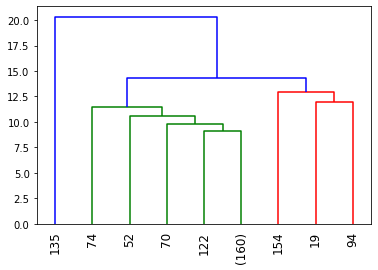

In [0]:
dendrogram(linked, orientation='top', distance_sort='descending', p=5, truncate_mode='level',
           show_leaf_counts=True, leaf_rotation=90)
plt.show()

#### DBScan

In [0]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=4).fit(df)
clustering.labels_

array([ 0,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,
        0, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1,  0, -1,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0, -1, -1,
        0, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1, -1,  0, -1,
       -1,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,
        0, -1, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1,
       -1, -1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1,
        0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,
        0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0])

#### PCA

In [0]:
from sklearn.decomposition import PCA

df_transformed = PCA(n_components=2).fit_transform(df)
df_tf = pd.DataFrame(df_transformed, columns=['First', 'Second'])
df_tf.head()

,First,Second
0,2.872830,-4.213749
1,0.939705,-1.270183
2,-0.501096,1.153175
3,2.596999,-3.343343
4,-1.527172,2.776561


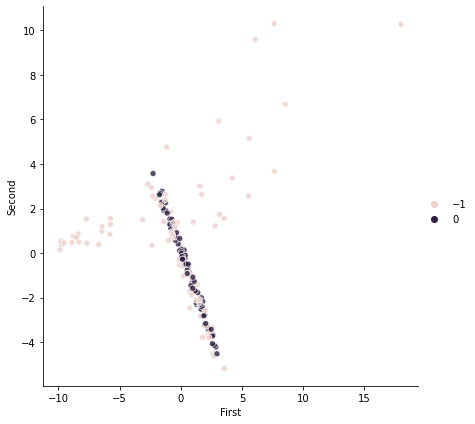

In [0]:
import seaborn as sns

sns.relplot(x="First", y="Second", hue=clustering.labels_, alpha=.8, height=6, data=df_tf)

#### Elbow method

Inertia for 1 clusters: 6552.0
Inertia for 2 clusters: 5328.686758785413
Inertia for 3 clusters: 4605.174852171929
Inertia for 4 clusters: 3838.3185702647716
Inertia for 5 clusters: 3508.099392253245
Inertia for 6 clusters: 3372.035273287456
Inertia for 7 clusters: 3053.446094185593
Inertia for 8 clusters: 2939.3716175729246
Inertia for 9 clusters: 2795.658299331468


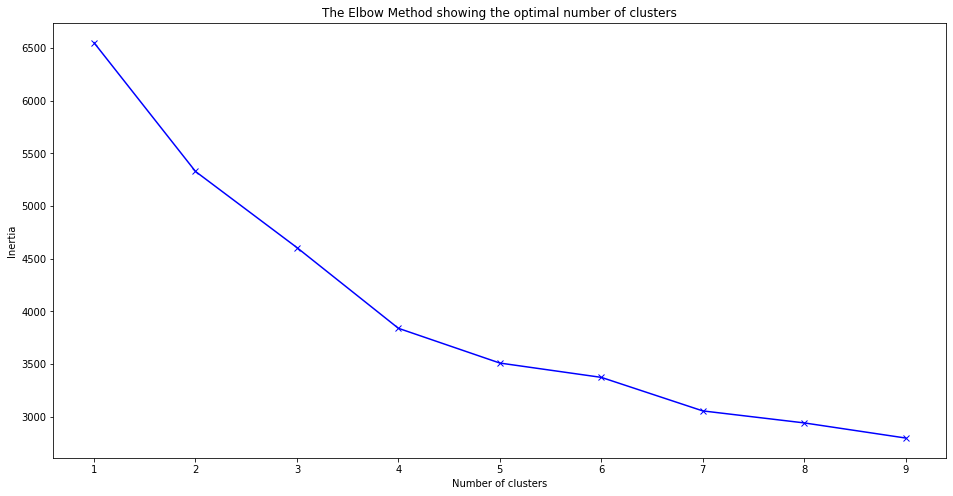

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    print(f'Inertia for {k} clusters: {kmeanModel.inertia_}')
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

#### KMeans using number of clusters from elbow method

In [0]:
#tried 6 clusters => left with 4
kmean_clustering = KMeans(n_clusters=4).fit(df)
kmean_clustering.labels_

array([2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2,
       2, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       3, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2], dtype=int32)

In [0]:
from sklearn.decomposition import FastICA

df_transformed = FastICA(n_components=2).fit_transform(df)
df_tf = pd.DataFrame(df_transformed, columns=['First', 'Second'])
df_tf.head()

,First,Second
0,-0.129226,0.056633
1,-0.039039,0.018694
2,0.035037,-0.009224
3,-0.102899,0.051924
4,0.084729,-0.029266


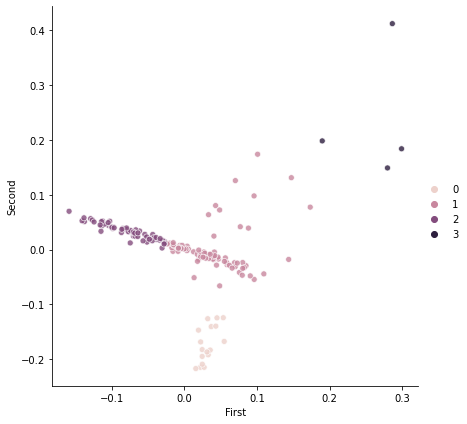

In [0]:
sns.relplot(x="First", y="Second", hue=kmean_clustering.labels_, alpha=.8, height=6, data=df_tf)

mean values according to the clusters

In [0]:
df_means = df.groupby(kmean_clustering.labels_).mean()
df_means.head()

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2015,Happiness Score 2015,Air pollution (Micrograms per cubic metre),Dwellings without basic facilities (Percentage),Educational attainment (Percentage),Employees working very long hours (Percentage),Employment rate (Percentage),Feeling safe walking alone at night (Percentage),Homicide rate (Ratio),Household net adjusted disposable income (US Dollar),Household net financial wealth (US Dollar),Housing expenditure (Percentage),Labour market insecurity (Percentage),Life expectancy (Years),Life satisfaction (Average score),Long-term unemployment rate (Percentage),Personal earnings (US Dollar),Quality of support network (Percentage),Rooms per person (Ratio),Self-reported health (Percentage),Stakeholder engagement for developing regulations (Average score),Student skills (Average score),Time devoted to leisure and personal care (Hours),Voter turnout (Percentage),Water quality (Percentage),Years in education (Years),RankDiff2017,RankDiff2016
0,-1.586322,1.709610,1.302367,1.136713,1.171631,1.251763,1.040067,1.772390,0.546987,-1.566413,1.672501,-1.552531,1.685353,-1.438995e+00,-0.980837,0.681539,-0.567356,1.335106,1.429763e+00,-0.742297,1.816355e+00,1.458112e+00,0.352565,-9.534020e-01,0.922808,1.858092e+00,-0.845294,1.979347e+00,1.542909e+00,1.720943e+00,1.492294e+00,2.070393e-01,0.976361,6.566007e-01,1.111792,1.701633,1.251399,0.032279,0.003013
1,-0.421798,0.377142,0.416470,0.388085,0.450976,0.109352,-0.154828,-0.168242,0.109159,-0.416023,0.377578,-0.398278,0.337295,2.238696e-01,0.042360,0.083606,-0.060038,-0.107186,-1.049285e-01,-0.059278,-2.158095e-01,-1.831719e-01,-0.022691,5.718540e-02,-0.007772,-2.838091e-01,0.110665,-2.417940e-01,-2.181365e-01,-1.792054e-01,-2.935888e-01,-8.363217e-02,0.043644,2.847477e-02,-0.261996,-0.204006,-0.147635,0.007074,-0.043607
2,1.072992,-1.040336,-0.973492,-0.900232,-0.958412,-0.502452,-0.005749,-0.243878,-0.360975,1.054467,-1.028967,1.030863,-0.984335,6.417742e-16,0.000000,0.000000,0.000000,0.000000,2.294792e-15,0.000000,9.658567e-16,-4.005354e-16,0.000000,-3.700880e-16,0.000000,-2.437925e-15,0.000000,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.000000,1.001817e-14,0.000000,0.000000,0.000000,-0.005987,0.043017
3,-0.552612,0.490717,0.356582,0.553677,-0.059638,-0.008657,-1.003814,-0.196319,0.833258,-0.478883,0.465680,-0.559418,0.596505,1.302534e+00,3.257814,-4.694058,3.702078,-3.369697,-3.820529e+00,4.429233,-3.079607e+00,-2.258780e+00,-1.010548,2.822472e+00,-3.754846,-1.794994e+00,1.213194,-3.213652e+00,-1.867430e+00,-3.461094e+00,-3.009133e-02,9.181745e-01,-5.087875,-3.402760e+00,0.907799,-2.845819,-2.144291,-0.197981,0.268736


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


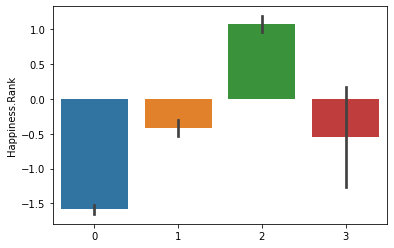

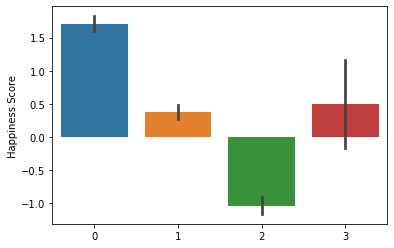

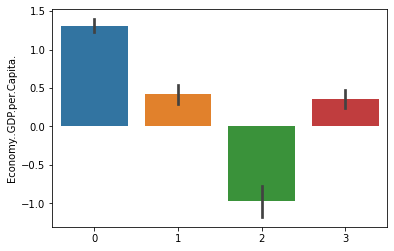

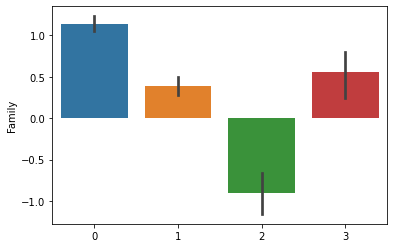

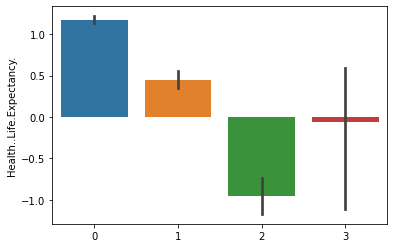

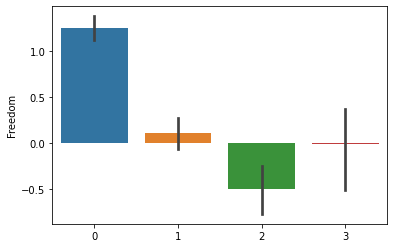

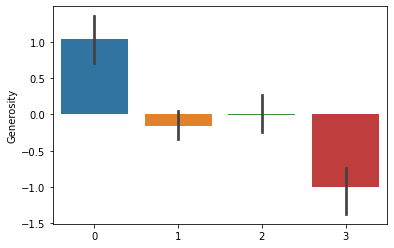

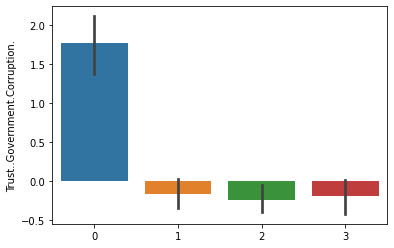

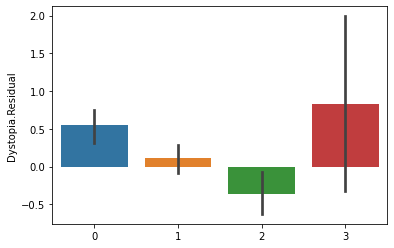

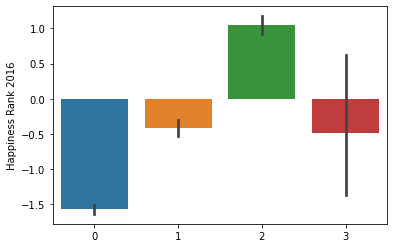

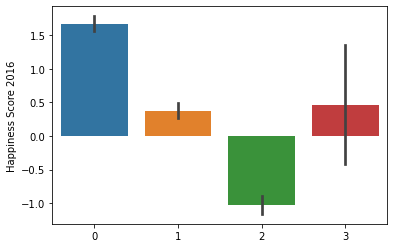

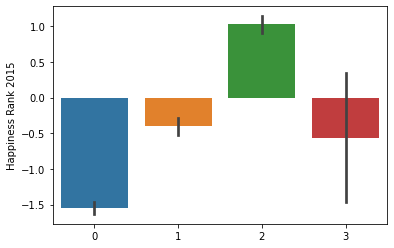

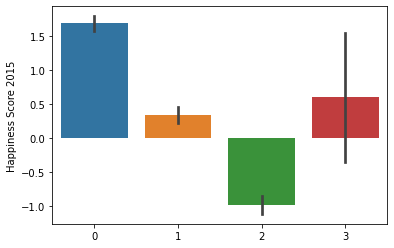

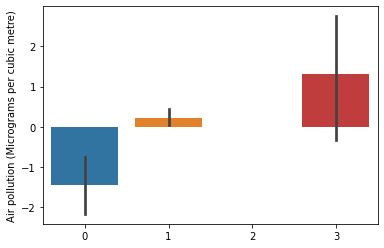

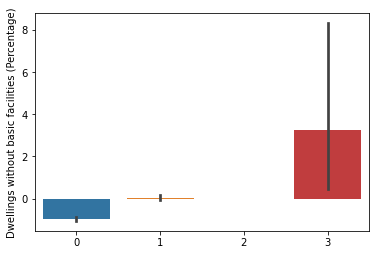

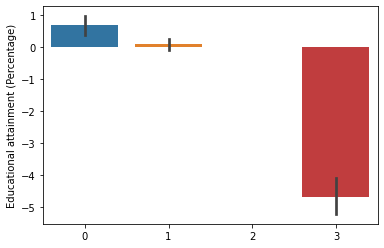

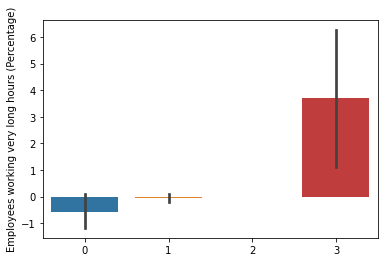

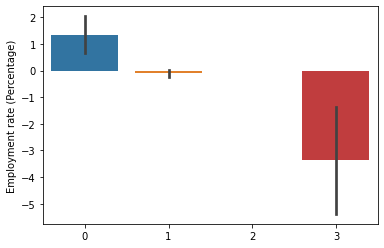

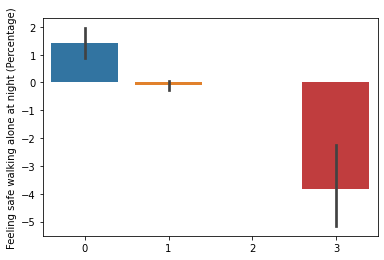

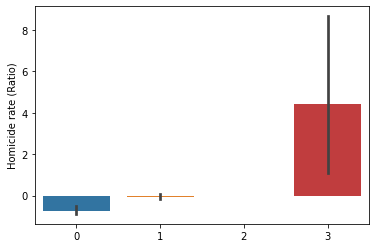

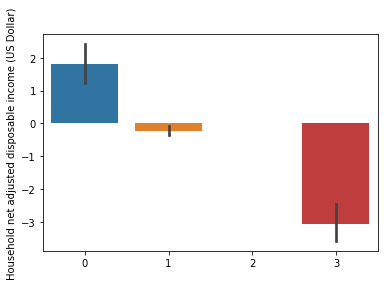

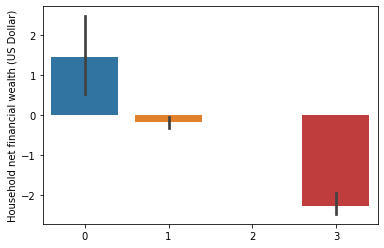

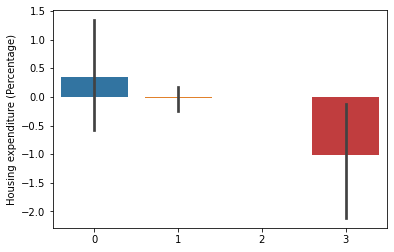

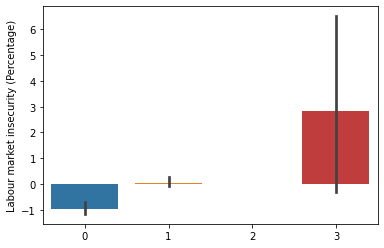

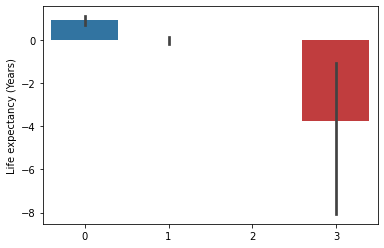

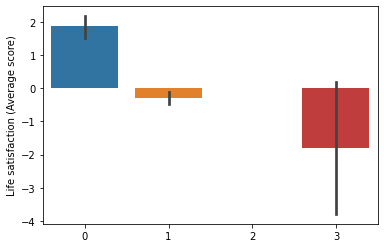

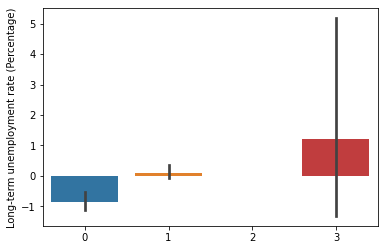

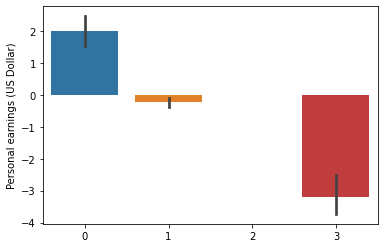

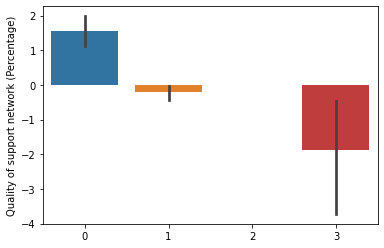

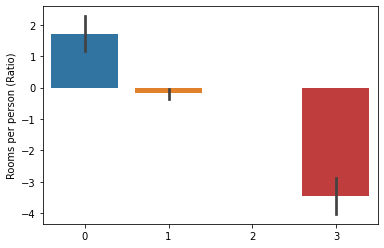

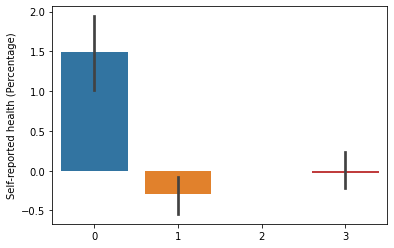

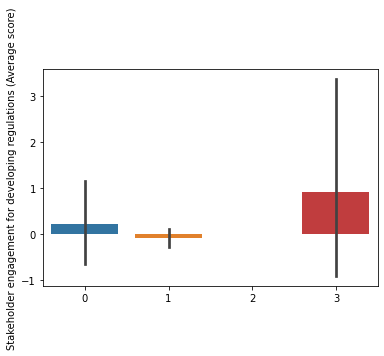

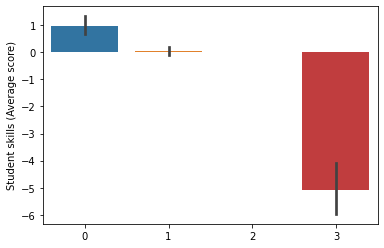

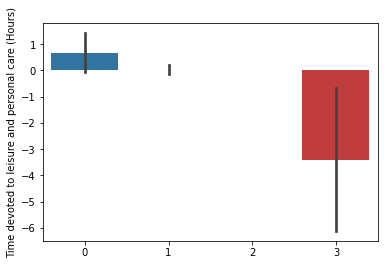

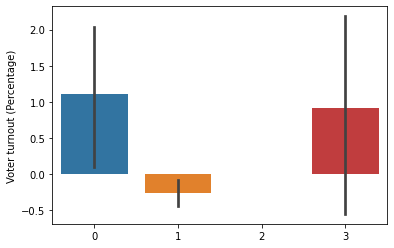

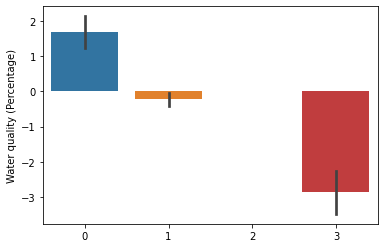

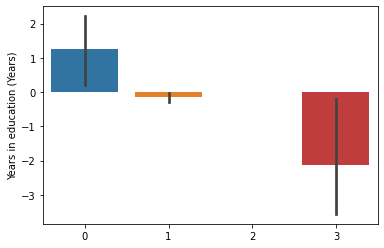

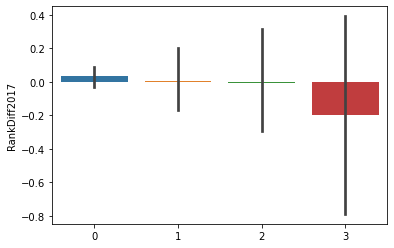

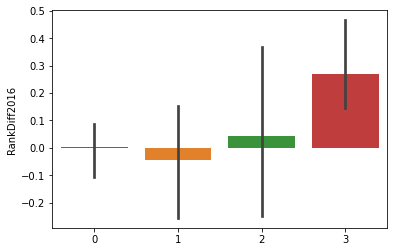

In [0]:
for index, col in enumerate(df.columns):
  plt.figure(index)
  sns.barplot(data=df, x=kmean_clustering.labels_, y=df[col], estimator=np.mean)

#### KMeans using number of continents as number of clusters

In [0]:
cluster_num = len(df_continent['Continent'].unique())
cluster_num

5

In [0]:
kmeans = KMeans(n_clusters=cluster_num).fit(df)
df['Gruca'] = kmeans.labels_
df.head()

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2015,Happiness Score 2015,Air pollution (Micrograms per cubic metre),Dwellings without basic facilities (Percentage),Educational attainment (Percentage),Employees working very long hours (Percentage),Employment rate (Percentage),Feeling safe walking alone at night (Percentage),Homicide rate (Ratio),Household net adjusted disposable income (US Dollar),Household net financial wealth (US Dollar),Housing expenditure (Percentage),Labour market insecurity (Percentage),Life expectancy (Years),Life satisfaction (Average score),Long-term unemployment rate (Percentage),Personal earnings (US Dollar),Quality of support network (Percentage),Rooms per person (Ratio),Self-reported health (Percentage),Stakeholder engagement for developing regulations (Average score),Student skills (Average score),Time devoted to leisure and personal care (Hours),Voter turnout (Percentage),Water quality (Percentage),Years in education (Years),RankDiff2017,RankDiff2016,Gruca
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.465876,-1.440368,-1.447685,-2.208294,-1.632718,-2.107119,0.503613,-0.636605,0.627821,1.712290,-1.838109,1.661870,-1.626841,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.859323,0.108042,0
Albania,0.721304,-0.655562,0.028481,-1.400603,0.792224,-0.190008,-0.353144,-0.855376,-0.751547,0.685178,-0.660990,0.350575,-0.376491,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,0.070130,1.036494,0
Algeria,-0.581697,0.478252,0.265952,-0.155182,0.291849,-1.221700,-1.375105,0.236055,1.498444,-0.935377,0.884262,-0.259855,0.207126,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,1.142576,-2.105960,3
Angola,1.442608,-1.439444,-0.313469,-0.307184,-2.209325,-2.846471,-1.154326,-0.548633,-0.492449,1.415568,-1.378169,1.300133,-1.213069,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.001366,0.322300,0
Argentina,-1.256465,1.149492,0.497861,0.914629,0.633520,0.596980,-1.064971,-0.651173,1.595368,-1.209274,1.152408,-1.118979,1.082552,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.072863,-0.249055,3


In [0]:
df['Gruca'].unique()

array([0, 3, 1, 4, 2], dtype=int32)

#### Classification

In [0]:
from sklearn.linear_model import LogisticRegression
import warnings

with warnings.catch_warnings():
  warnings.simplefilter('ignore')

  #remove gruca from input attribute
  #indp_cols = np.delete(df.columns, len(df.columns)-1)
  #print(indp_cols)


  #Logistic Regression is a classification algorithm
  lr = LogisticRegression()
  lr.fit(df[num_cols], df_continent['Continent'])

  lr_outcome = lr.predict(df[num_cols])
  df['Razred'] = lr_outcome


#df['Continent'] = df_continent
df.head(10)

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2015,Happiness Score 2015,Air pollution (Micrograms per cubic metre),Dwellings without basic facilities (Percentage),Educational attainment (Percentage),Employees working very long hours (Percentage),Employment rate (Percentage),Feeling safe walking alone at night (Percentage),Homicide rate (Ratio),Household net adjusted disposable income (US Dollar),Household net financial wealth (US Dollar),Housing expenditure (Percentage),Labour market insecurity (Percentage),Life expectancy (Years),Life satisfaction (Average score),Long-term unemployment rate (Percentage),Personal earnings (US Dollar),Quality of support network (Percentage),Rooms per person (Ratio),Self-reported health (Percentage),Stakeholder engagement for developing regulations (Average score),Student skills (Average score),Time devoted to leisure and personal care (Hours),Voter turnout (Percentage),Water quality (Percentage),Years in education (Years),RankDiff2017,RankDiff2016,Gruca,Razred
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.465876,-1.440368,-1.447685,-2.208294,-1.632718,-2.107119,0.503613,-0.636605,0.627821,1.712290,-1.838109,1.661870,-1.626841,6.417742e-16,0.000000,0.000000,0.000000,0.000000,2.294792e-15,0.000000,9.658567e-16,-4.005354e-16,0.000000,-3.700880e-16,0.000000,-2.437925e-15,0.000000,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.00000,1.001817e-14,0.000000,0.000000,0.000000,-0.859323,0.108042,2,africa
Albania,0.721304,-0.655562,0.028481,-1.400603,0.792224,-0.190008,-0.353144,-0.855376,-0.751547,0.685178,-0.660990,0.350575,-0.376491,6.417742e-16,0.000000,0.000000,0.000000,0.000000,2.294792e-15,0.000000,9.658567e-16,-4.005354e-16,0.000000,-3.700880e-16,0.000000,-2.437925e-15,0.000000,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.00000,1.001817e-14,0.000000,0.000000,0.000000,0.070130,1.036494,2,asia
Algeria,-0.581697,0.478252,0.265952,-0.155182,0.291849,-1.221700,-1.375105,0.236055,1.498444,-0.935377,0.884262,-0.259855,0.207126,6.417742e-16,0.000000,0.000000,0.000000,0.000000,2.294792e-15,0.000000,9.658567e-16,-4.005354e-16,0.000000,-3.700880e-16,0.000000,-2.437925e-15,0.000000,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.00000,1.001817e-14,0.000000,0.000000,0.000000,1.142576,-2.105960,0,europe
Angola,1.442608,-1.439444,-0.313469,-0.307184,-2.209325,-2.846471,-1.154326,-0.548633,-0.492449,1.415568,-1.378169,1.300133,-1.213069,6.417742e-16,0.000000,0.000000,0.000000,0.000000,2.294792e-15,0.000000,9.658567e-16,-4.005354e-16,0.000000,-3.700880e-16,0.000000,-2.437925e-15,0.000000,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.00000,1.001817e-14,0.000000,0.000000,0.000000,-0.001366,0.322300,2,africa
Argentina,-1.256465,1.149492,0.497861,0.914629,0.633520,0.596980,-1.064971,-0.651173,1.595368,-1.209274,1.152408,-1.118979,1.082552,6.417742e-16,0.000000,0.000000,0.000000,0.000000,2.294792e-15,0.000000,9.658567e-16,-4.005354e-16,0.000000,-3.700880e-16,0.000000,-2.437925e-15,0.000000,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.00000,1.001817e-14,0.000000,0.000000,0.000000,-0.072863,-0.249055,0,ameriacas
Armenia,1.000519,-0.903006,-0.208801,-0.659608,0.379697,-1.465640,-1.266215,-0.990889,-0.686674,0.959074,-0.929137,1.074048,-0.926681,6.417742e-16,0.000000,0.000000,0.000000,0.000000,2.294792e-15,0.000000,9.658567e-16,-4.005354e-16,0.000000,-3.700880e-16,0.000000,-2.437925e-15,0.000000,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.00000,1.001817e-14,0.000000,0.000000,0.000000,0.070130,-0.391894,2,europe
Australia,-1.582216,1.781953,1.240317,1.167656,1.288863,1.342660,1.788682,1.829433,0.449039,-1.597294,1.755057,-1.571150,1.723988,-3.032907e+00,-0.754272,0.368093,1.223430,1.106162,-8.129327e-0

In [0]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(df_continent['Continent'], df['Razred'])
print(f'Accuracy score: {acc}')

Accuracy score: 0.8035714285714286


mapping continents

In [0]:
prototypes = ['France', 'Australia', 'Canada', 'Kenya', 'Korea']
continents = ['europe', 'other', 'ameriacas', 'africa', 'asia']
mapped_cont = {}
gruce = df['Gruca'].loc[df.index == 'France'].values.flatten()

for index, country in enumerate(prototypes):
  cont_code = df['Gruca'].loc[df.index == country].values.flatten()[0]
  #print(cont_code)
  mapped_cont[continents[index]] = cont_code

print(mapped_cont)

{'europe': 0, 'other': 3, 'ameriacas': 3, 'africa': 2, 'asia': 4}


In [0]:
cont_m = pd.Series(df_continent['Continent'].values.flatten())
#print(cont_m) 
cont_m = cont_m.map(mapped_cont)
print(cont_m)

0      4
1      0
2      2
3      2
4      3
      ..
163    3
164    4
165    2
166    2
167    2
Length: 168, dtype: int64


In [0]:
acc_kmeans = accuracy_score(cont_m, df['Gruca'])
print(f'Accuracy score using KMeans clustering: {acc_kmeans}')

Accuracy score using KMeans clustering: 0.44047619047619047


In [0]:
#pca 4 dim, klas svm acc

transformed = PCA(n_components=4).fit_transform(df)
df_transfmd = pd.DataFrame(transformed, columns=['First', 'Second', 'Third', 'Fourth'])
df_transfmd.head()

,First,Second,Third,Fourth
0,2.872830,-4.213749,0.674926,0.583791
1,0.939705,-1.270183,-0.105568,-0.136869
2,-0.501096,1.153175,-0.213697,0.513839
3,2.596999,-3.343343,0.158660,0.094009
4,-1.527172,2.776561,-0.496261,0.110544


In [0]:
from sklearn.svm import LinearSVC
import warnings

with warnings.catch_warnings():
  warnings.simplefilter('ignore')

  svc = LinearSVC()
  svc.fit(df[num_cols], df_continent['Continent'])

  svc_outcome = svc.predict(df[num_cols])
  df['SVM_Razred'] = svc_outcome

df.head()

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2015,Happiness Score 2015,Air pollution (Micrograms per cubic metre),Dwellings without basic facilities (Percentage),Educational attainment (Percentage),Employees working very long hours (Percentage),Employment rate (Percentage),Feeling safe walking alone at night (Percentage),Homicide rate (Ratio),Household net adjusted disposable income (US Dollar),Household net financial wealth (US Dollar),Housing expenditure (Percentage),Labour market insecurity (Percentage),Life expectancy (Years),Life satisfaction (Average score),Long-term unemployment rate (Percentage),Personal earnings (US Dollar),Quality of support network (Percentage),Rooms per person (Ratio),Self-reported health (Percentage),Stakeholder engagement for developing regulations (Average score),Student skills (Average score),Time devoted to leisure and personal care (Hours),Voter turnout (Percentage),Water quality (Percentage),Years in education (Years),RankDiff2017,RankDiff2016,Gruca,SVM_Razred
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.465876,-1.440368,-1.447685,-2.208294,-1.632718,-2.107119,0.503613,-0.636605,0.627821,1.712290,-1.838109,1.661870,-1.626841,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.859323,0.108042,0,africa
Albania,0.721304,-0.655562,0.028481,-1.400603,0.792224,-0.190008,-0.353144,-0.855376,-0.751547,0.685178,-0.660990,0.350575,-0.376491,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,0.070130,1.036494,0,asia
Algeria,-0.581697,0.478252,0.265952,-0.155182,0.291849,-1.221700,-1.375105,0.236055,1.498444,-0.935377,0.884262,-0.259855,0.207126,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,1.142576,-2.105960,3,africa
Angola,1.442608,-1.439444,-0.313469,-0.307184,-2.209325,-2.846471,-1.154326,-0.548633,-0.492449,1.415568,-1.378169,1.300133,-1.213069,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.001366,0.322300,0,africa
Argentina,-1.256465,1.149492,0.497861,0.914629,0.633520,0.596980,-1.064971,-0.651173,1.595368,-1.209274,1.152408,-1.118979,1.082552,6.417742e-16,0.0,0.0,0.0,0.0,2.294792e-15,0.0,9.658567e-16,-4.005354e-16,0.0,-3.700880e-16,0.0,-2.437925e-15,0.0,-1.087467e-15,6.591081e-15,-1.001841e-15,2.166626e-15,-1.359171e-15,0.0,1.001817e-14,0.0,0.0,0.0,-0.072863,-0.249055,3,ameriacas


In [0]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(df_continent['Continent'], df['SVM_Razred'])
print(f'Accuracy score: {acc}')

Accuracy score: 0.7976190476190477
